# Lineage Tracking for Cells in the Mother Machine

In [1]:
from LineageTrack.lineage_tracker import LineageTrack
from LineageTrack.visualiser import Visualiser
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image, display, HTML

### comment out ###
# from jupyterthemes import jtplot
# jtplot.style(theme='oceans16')
# %load_ext autoreload

In [2]:
mask_dir = "D:\\UROP-Data\\binary_masks\\"
FOV_dir = "F:\\Cambridge\\MENG\\UROP2022\\Data\\MMLT\\FOV000\\"
csv_save_dir = FOV_dir + "csv\\"
vis_save_dir = FOV_dir + "track\\"
template_mask = ['xy', '_mCherry_TR', '_T', '-_epoch-20_prob-99.png']
directory = FOV_dir + "prop\\"
exp = LineageTrack.from_path(directory)

Looking for data at these locations:
F:\Cambridge\MENG\UROP2022\Data\MMLT\FOV000\prop\xy000_mCherry_epoch-20_prob-99.csv
F:\Cambridge\MENG\UROP2022\Data\MMLT\FOV000\prop\xy000_PC_epoch-20_prob-99.csv
F:\Cambridge\MENG\UROP2022\Data\MMLT\FOV000\prop\xy000_YFP_epoch-20_prob-99.csv
Finished loading the data
(16593, 12)


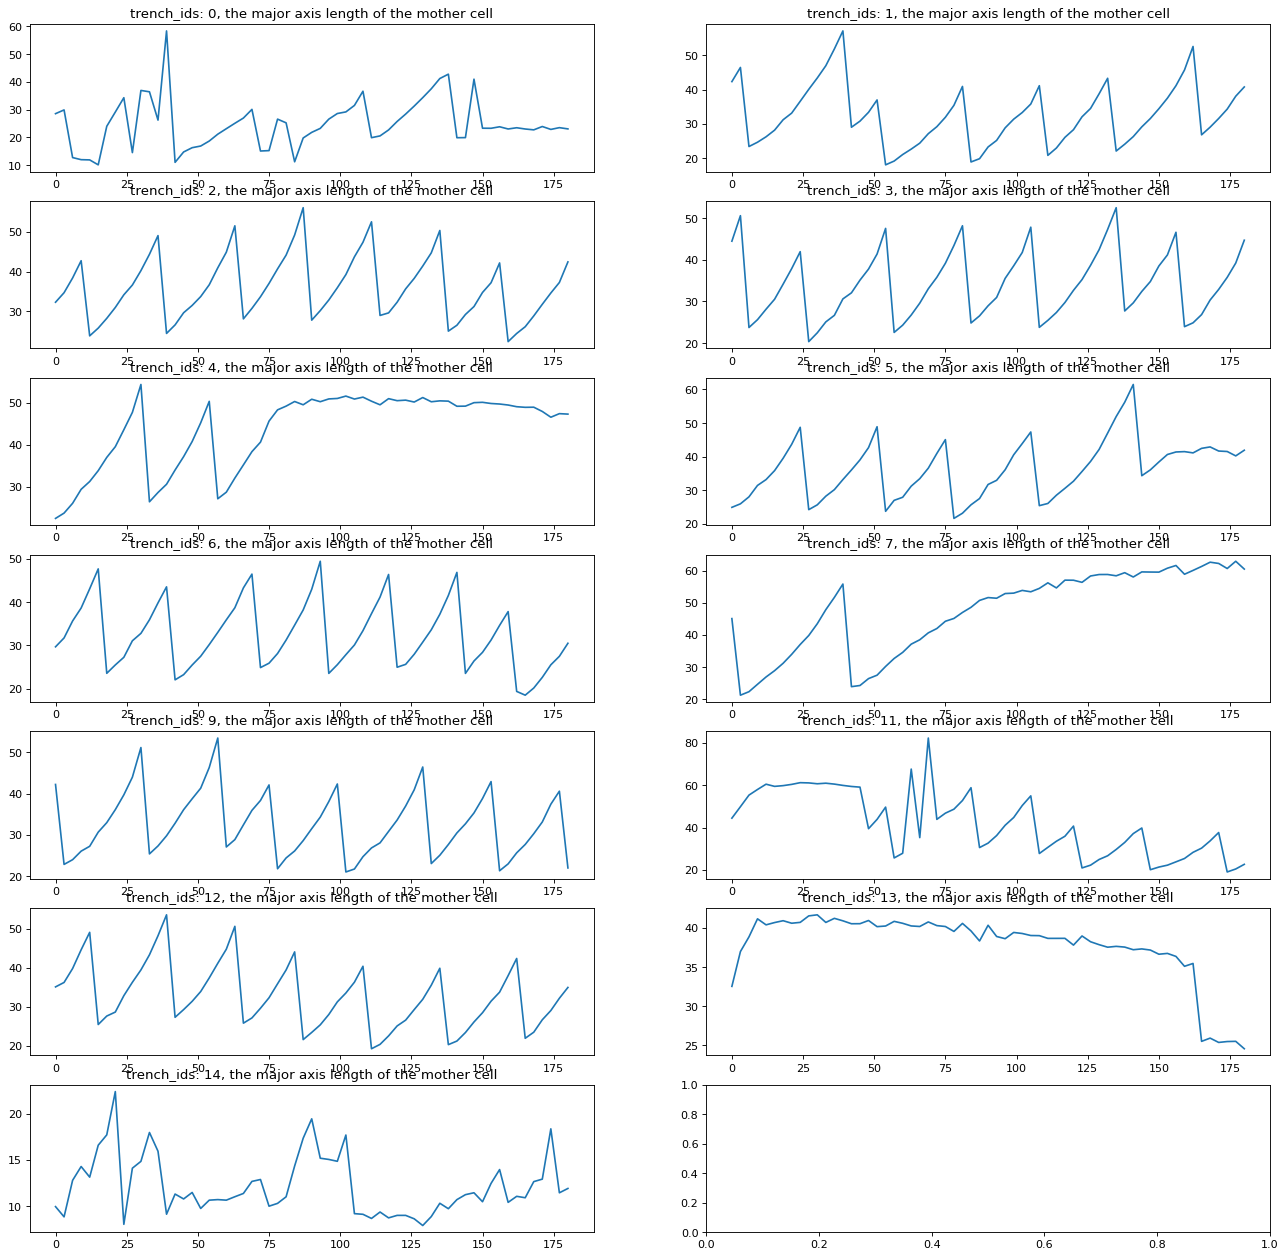

In [3]:
m = exp.get_mother_cell_growth(exp.trenches, plot=True)

In [4]:
exp.trenches

[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14]

In [5]:
# 0 and 14 is really messy
# segmentation error in 11
trench_to_track = [1, 2, 3, 4, 5, 6, 7, 9, 12, 13]

In [6]:
mcell1, idx1 = exp.find_division(1, plot=False)
e_phase_idx1 = idx1[:]
exp.collect_model_para(mcell1, e_phase_idx1, plot=False)

In [7]:
mcell2, idx2 = exp.find_division(2, plot=False)
mcell3, idx3 = exp.find_division(3, plot=False)
mcell4, idx4 = exp.find_division(4, plot=False)
mcell5, idx5 = exp.find_division(5, plot=False)
exp.collect_model_para(mcell2, idx2[:])
exp.collect_model_para(mcell3, idx3[:])
e_phase_idx4 = idx4[:-1]
exp.collect_model_para(mcell4, e_phase_idx4)
exp.collect_model_para(mcell4, e_phase_idx4)
exp.collect_model_para(mcell5, idx5[:])

In [8]:
exp.update_model_para(model="unif")


                    The average time interval for division is 26.08695652173913
                    The time constant for exponential growth is (23.289765029510846, 2.127100747471403)
                    The average division length is 48.36530671800886 
                    with variance 30.083732799316962 and skewness -0.052984299565577854
                    The length for adder model is 24.16171629532524 
                    with variance 33.14769156251446 and skewness -0.2588605524943305
                    


In [10]:
exp.track_trenches_iteratively(trenches=trench_to_track, threshold=-1, max_dpf=3, search_mode="SeqMatch", 
                               p_sp=0, special_reporter="YFP", show_details=False, save_dir=csv_save_dir, 
                               ret_df=False, fill_gap=False, adap_dpf=True, drift=False, skew_model=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:   36.4s remaining:  2.4min
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   42.2s remaining:   42.2s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:   44.1s remaining:   11.0s


dict_keys([1, 2, 3, 4, 5, 6, 7, 9, 12, 13])


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   48.0s finished


'output saved at F:\\Cambridge\\MENG\\UROP2022\\Data\\MMLT\\FOV000\\csv\\track_TR_1_2_3_4_5_6_7_9_12_13.csv and F:\\Cambridge\\MENG\\UROP2022\\Data\\MMLT\\FOV000\\csv\\lysis_TR_1_2_3_4_5_6_7_9_12_13.csv.'

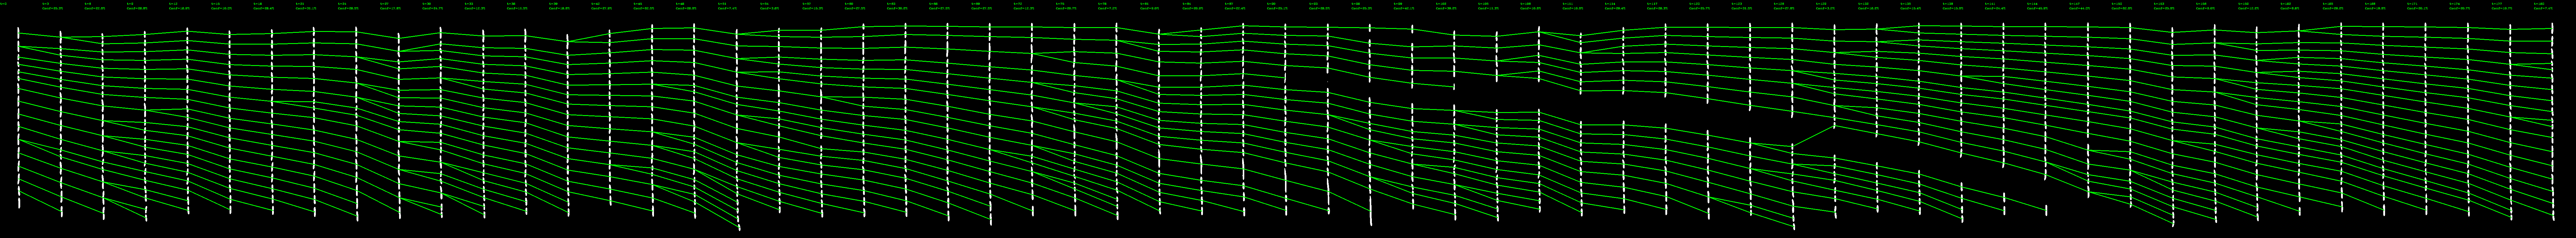

In [3]:
paths = [f for f in os.listdir(csv_save_dir) if os.path.isfile(os.path.join(csv_save_dir, f))]
path1 = csv_save_dir + paths[0]
path2 = csv_save_dir + paths[1]
vis = Visualiser.from_path("000", path1, path2)
#vis.label_images(mask_dir, mode="landscape-line", save_dir=vis_save_dir, template=template_mask)
files = [f for f in os.listdir(vis_save_dir) if os.path.isfile(os.path.join(vis_save_dir, f))]
display(Image(vis_save_dir+files[0], unconfined=True))

In [18]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
%autoreload
vis.label_images(mask_dir, mode="landscape-colour-scale", 
                 save_dir=vis_save_dir, 
                 template=template_mask, for_frames=None, colour_scale="inferno")

hello
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 24, 25, 26, 27, 28, 30, 32, 48, 64, 65, 66, 68, 70, 72, 74, 76, 80, 84, 86, 88, 92, 96, 100, 104, 108, 112, 116, 120, 128, 144, 160, 168, 176, 184, 192, 200, 208, 224]
saved as F:\Cambridge\MENG\UROP2022\Data\MMLT\FOV000\track\\landscape_barcode_xy000_mCherry_TR1_T-_epoch-20_prob-99.png
hello
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 104, 112, 120, 128, 136, 144, 152, 160, 168, 176, 184, 192, 208, 224, 240]
saved as F:\Cambridge\MENG\UROP2022\Data\MMLT\FOV000\track\\landscape_barcode_xy000_mCherry_TR2_T-_epoch-20_prob-99.png
hello
[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 112, 120, 128, 136, 144, 152, 160, 

In [4]:
vis.label_images(mask_dir, mode="generation-by-poles", 
                 save_dir=vis_save_dir, 
                 template=template_mask)

0.04402689812081273
0.020361674632660875
[(1.0, 81.0, 90.0), (1.0, 87.0, 102.0), (1.0, 147.0, 150.0), (4.0, 162.0, 180.0), (5.0, 150.0, 174.0), (5.0, 171.0, 180.0), (7.0, 105.0, 180.0), (9.0, 114.0, 147.0), (9.0, 105.0, 144.0), (9.0, 51.0, 54.0), (9.0, 48.0, 51.0), (13.0, 33.0, 180.0), (13.0, 33.0, 180.0), (13.0, 33.0, 180.0), (13.0, 153.0, 180.0), (13.0, 177.0, 180.0)]


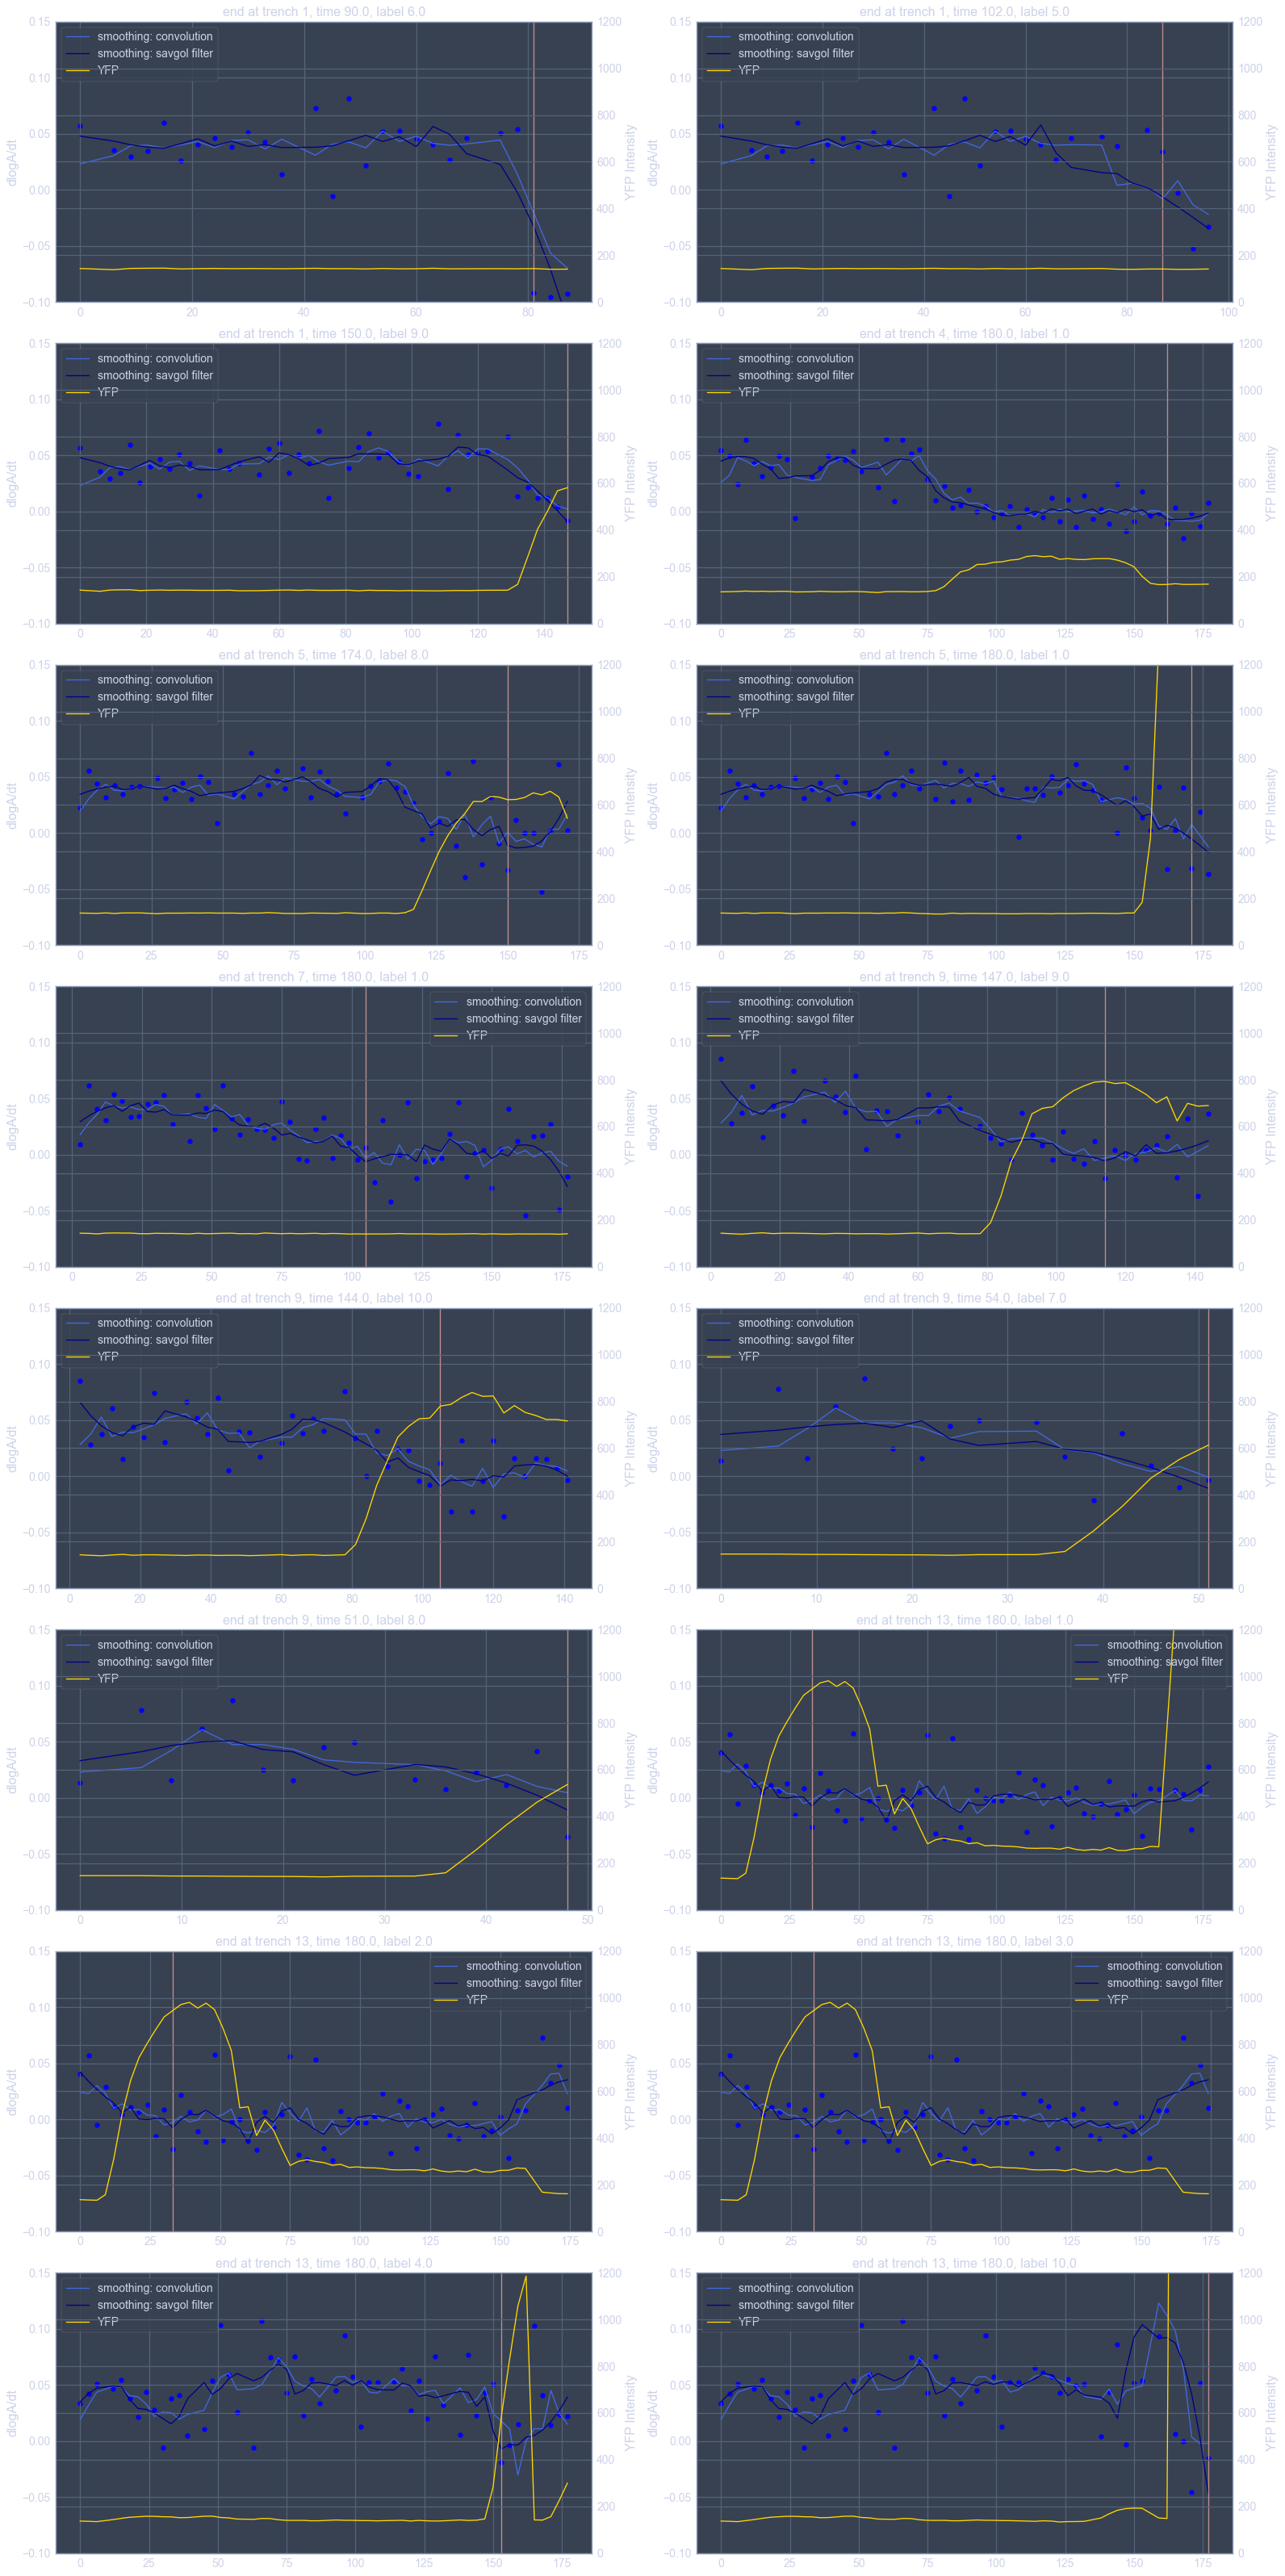

In [11]:
from statsmodels.nonparametric.kernel_regression import KernelReg
from scipy.signal import savgol_filter


def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def get_model(cells):
    avg_rates = []
    var_rates = []
    all_lineages = dict()
    for key in cells:
        all_lineages[key] = exp.generate_lineage(key)
        for line in all_lineages[key]:
            if line.daughters[0] is None:
                dlogAdt = []
                t = []
                track = line
                dlogAdt = [res[0] for res in track.partial_dlogA_dt()] + dlogAdt
                t = [res[1][0] for res in track.partial_dlogA_dt()] + t
                while track.parent is not None:
                    track = track.parent
                    dlogAdt = [res[0] for res in track.partial_dlogA_dt()] + dlogAdt
                    t = [res[1][0] for res in track.partial_dlogA_dt()] + t
                if len(dlogAdt) >= 5:
                    avg_rates.append(np.mean(dlogAdt))
                    var_rates.append(np.var(dlogAdt))
    return avg_rates, var_rates

def detect_infection(subplots, cells, avg_rates, var_rates):
    cols = 2
    rows = round(np.ceil(subplots / cols))
    fig, axes = plt.subplots(nrows=rows, ncols=cols, dpi=80, figsize=(20, 40))
    fig.tight_layout()
    axes_flat = axes.flatten()
    i = 0
    infection_times = []
    all_lineages = dict()
    for key in cells:
        all_lineages[key] = exp.generate_lineage(key)
        for line in all_lineages[key]:
            # print(line.resident_time[0])
            if line.daughters[0] is None:
                track = line
                dlogAdt = [res[0] for res in track.partial_dlogA_dt()]
                yfp = track.reporter_intensities[:-1]
                t = [res[1][0] for res in track.partial_dlogA_dt()]
                while track.parent is not None:
                    track = track.parent
                    dlogAdt = [res[0] for res in track.partial_dlogA_dt()] + dlogAdt
                    yfp = track.reporter_intensities[:-1] + yfp
                    t = [res[1][0] for res in track.partial_dlogA_dt()] + t
#                 kr = KernelReg(dlogAdt, t, 'c')
#                 y_pred, y_std = kr.fit(t)
                if len(dlogAdt) >= 10:
                    y_hat = savgol_filter(dlogAdt, 10, 2)
                    for time, y in zip(t, y_hat):
                        if y < np.mean(avg_rates) - 2.5 * np.mean(np.sqrt(var_rates)):
                            axes_flat[i].scatter(t, dlogAdt, c='blue')
                            lns1 = axes_flat[i].plot(t, smooth(dlogAdt, 4), 'royalblue', label='smoothing: convolution')
                            lns2 = axes_flat[i].plot(t, y_hat, 'darkblue', label='smoothing: savgol filter')
                            axes_flat[i].axvline(x=time, color='rosybrown')
                            axes_flat[i].set_ylabel("dlogA/dt")
                            axes_flat[i].set_ylim([-0.1, 0.15])
                            axes2 = axes_flat[i].twinx()
                            lns3 = axes2.plot(t, yfp, 'gold', label='YFP')
                            axes2.set_ylabel("YFP Intensity")
                            axes2.set_ylim([0, 1200])
                            axes_flat[i].set_title(f"end at trench {key}, time {line.resident_time[-1]}, label {line.labels[-1]}")
                            lns = lns1+lns2+lns3
                            labs = [l.get_label() for l in lns]
                            axes_flat[i].legend(lns, labs)
                            i += 1
                            infection_times.append((line.trench, time, line.resident_time[-1]))
                            break
            if i >= subplots:
                fig.tight_layout()
                fig.savefig(FOV_dir + 'growth_rate_and_YFP.png')
                return infection_times
    fig.tight_layout()
    return infection_times
avg_rates, var_rates = get_model(exp.all_cells)
print(np.mean(avg_rates))
print(np.sqrt(np.mean(var_rates)))

infect = detect_infection(16, exp.all_cells, avg_rates, var_rates)

print(infect)

In [15]:
lineages = [exp.generate_lineage(1, mode="footprint", frame=30, label=6), 
            exp.generate_lineage(1, mode="footprint", frame=34, label=5),
            exp.generate_lineage(1, mode="footprint", frame=50, label=9)]
vis.highlight_lineage(lineages,
                      "F:/Cambridge/MENG/UROP 2022/Data/MMLT/FOV000/track/landscape_line_xy000_mCherry_TR1_T-_epoch-20_prob-99.png",
                      "F:/Cambridge/MENG/UROP 2022/Data/MMLT/FOV000/track/")
lineages = [exp.generate_lineage(4, mode="footprint", frame=60, label=1)]
vis.highlight_lineage(lineages,
                      "F:/Cambridge/MENG/UROP 2022/Data/MMLT/FOV000/track/landscape_line_xy000_mCherry_TR4_T-_epoch-20_prob-99.png",
                      "F:/Cambridge/MENG/UROP 2022/Data/MMLT/FOV000/track/")
lineages = [exp.generate_lineage(5, mode="footprint", frame=58, label=8), 
            exp.generate_lineage(5, mode="footprint", frame=60, label=1)]
vis.highlight_lineage(lineages,
                      "F:/Cambridge/MENG/UROP 2022/Data/MMLT/FOV000/track/landscape_line_xy000_mCherry_TR5_T-_epoch-20_prob-99.png",
                      "F:/Cambridge/MENG/UROP 2022/Data/MMLT/FOV000/track/")
lineages = [exp.generate_lineage(7, mode="footprint", frame=60, label=1)]
vis.highlight_lineage(lineages,
                      "F:/Cambridge/MENG/UROP 2022/Data/MMLT/FOV000/track/landscape_line_xy000_mCherry_TR7_T-_epoch-20_prob-99.png",
                      "F:/Cambridge/MENG/UROP 2022/Data/MMLT/FOV000/track/")
lineages = [exp.generate_lineage(9, mode="footprint", frame=49, label=9), 
            exp.generate_lineage(9, mode="footprint", frame=48, label=10),
            exp.generate_lineage(9, mode="footprint", frame=18, label=7)]
vis.highlight_lineage(lineages,
                      "F:/Cambridge/MENG/UROP 2022/Data/MMLT/FOV000/track/landscape_line_xy000_mCherry_TR9_T-_epoch-20_prob-99.png",
                      "F:/Cambridge/MENG/UROP 2022/Data/MMLT/FOV000/track/")
lineages = [exp.generate_lineage(13, mode="footprint", frame=60, label=1), 
            exp.generate_lineage(13, mode="footprint", frame=60, label=4),
            exp.generate_lineage(13, mode="footprint", frame=60, label=10)]
vis.highlight_lineage(lineages,
                      "F:/Cambridge/MENG/UROP 2022/Data/MMLT/FOV000/track/landscape_line_xy000_mCherry_TR13_T-_epoch-20_prob-99.png",
                      "F:/Cambridge/MENG/UROP 2022/Data/MMLT/FOV000/track/")

saved as F:/Cambridge/MENG/UROP 2022/Data/MMLT/FOV000/track/\highlighted_landscape_line_xy000_mCherry_TR1_T-_epoch-20_prob-99.png
saved as F:/Cambridge/MENG/UROP 2022/Data/MMLT/FOV000/track/\highlighted_landscape_line_xy000_mCherry_TR4_T-_epoch-20_prob-99.png
saved as F:/Cambridge/MENG/UROP 2022/Data/MMLT/FOV000/track/\highlighted_landscape_line_xy000_mCherry_TR5_T-_epoch-20_prob-99.png
saved as F:/Cambridge/MENG/UROP 2022/Data/MMLT/FOV000/track/\highlighted_landscape_line_xy000_mCherry_TR7_T-_epoch-20_prob-99.png
saved as F:/Cambridge/MENG/UROP 2022/Data/MMLT/FOV000/track/\highlighted_landscape_line_xy000_mCherry_TR9_T-_epoch-20_prob-99.png
saved as F:/Cambridge/MENG/UROP 2022/Data/MMLT/FOV000/track/\highlighted_landscape_line_xy000_mCherry_TR13_T-_epoch-20_prob-99.png
